In [1]:
#Library
import nltk
import csv
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[-1m'
   END = '\033[0m'

In [2]:
#Library Stopwords
stopset = set(stopwords.words('indonesian'))
#update data stopwords
stopset.update(['air','arsy','baiknya','rusa','kaki','arab','serah','pedoman','istana','segenap','kasih',
'dahi','daki','diminumnnya','dinampakkan','dinding','dur','emas','gelegak','gemuk','gurau','halal','hancur',
'situ','gila', 'susu', 'berkali','kali', 'kurangnya', 'mata', 'olah','sekurang', 'setidak', 'tama','bani', 
'nafkah','ahli','alam','akrab','alih','amal','angin','arah','asai','asap','awas','badwi','bahaya','bala',
'bantu','batang','bathil','bau','beban','belah','belas','berita','bit','bunga','cabang','campur','senda',
'dalamnya','sungguh','allah','masuk','tuhan','balas''hapus','tidaknya','cari','puluh','ikrar','tenggelam',
'ayat','hadap','balas','hasta','haus','hias','hidang','hijrah','hubung','hujan','iring','isteri','buah',
'iman','sedia','kerja','baca','laku','hak','dengar','muka','hadap','jaga','lipat','ringan','rahasia',
'rasul','hidup','ya','selimut','barangsiapa','tinggal','jalan','lihat','diam','manusia','firman','tolong',
'niscaya','dunia','kecuali','laki','perempuan','sembah','seret','nya','barang','rugi','mohon','bawa','mudah',
'temu','intai','mahkluk','risalah','liput','rombong','penuh','kitab','ganda','lempar','buka','lindung',
'golong','turun','bangkit','tiada','hai','senang','mukmin','senang','takwa','kumpul','himpun','kuat','pergi',
'rahmat','biar','sekira','anak','sentu','timbang','usir','tolak','jenis','isi','fasik','pegang','leluasa',
'lari','umat','al','tolak','kenan','engkau','sia','pasuk','jenis','duniawi','timpa','sangka','tengkar',
'dina','cahaya','bumi','ancam','harta','dorong','mahkluk','doa','sentuh','limpah','kuasa','lezat',
'hamba','taubat','pelihara','lantar','gelap','keras','malaikat','musuh','ambil','seru','sebahagian','hitam',
'pikir','pecah','coba','tutup','kawan','pedih','putus','quran','lemah','cacat','maha','halang','nabi',
'bicara','keridhaan','cipta','mesjid','pisah','tumpuk','simpang','kayu','tidur','tikar','selamat','sekutu',
'sikap','batu','bahan','dahaga','halau','tipu','duduk','nampakkan','buta','malam','keping','gelita',
'gembira','hati','jatuh','sempit','kalah','larang','suka','lawan','sengaja','harap','kulit','usaha','kelak',
'rezeki','negeri','tatkala','suara','jungkir','sisi','jelek','timpal','mengada','adakan','janji','dasar',
'prasangka','gilir','langgar','rasai','raka','lutut','jiwa','bijaksana','giring','kalimat','terang',
'rupa','kepala','lupa','kaum','kutu','keri','gelagak','maksud','keri','pekak','saleh','ganti','perkasa',
'bisu','padam','karunia','saksi','berangkat','rasulullah','terik','fitnah','bangun','ikan','nyata','habis',
'gejolak','rapat','asa','shiddiqien','anggap','heran','terima','surga','benda','takut','wahyu','nerak',
'belaka','jurang','runtuh','tanda','tebus','tepi','agama','manfaat','binatang','patut','hikmah','hilang',
'luas','mekah','tindas','berat','lekat','keliling','telinga','tangguh','andaikata','kepung','istirahat',
'lapis','ragu','desak','pasu','gabung','mundur','belok','lampau','geram','perhati','umpan','salam',
'ampun','besi','rantai','pandang','ilah','adil','ulang','bantah','berbantah','hindar','tingkat','pagi',
'nama','berfikir','langit','ternak','batas','kabar','tanah','samping','gagal','akibat','ibadat','alir',
'rintih','tunduk','izin','golak','muhammad','masjidilharam','henti','umpan','beli','sentosa','aman',
'sungkur','alas','seraya','sakit','taat','sumpah','nama','rang','lesu','sumbat','sanggup','gelagak',
'keluarga','kiri','bilang','beli','ngeri','cabut','alangkah','ibrahim','perintah','benci','indah',
'ku','nikmat','orng','dingin','tujuh','pakai','kena','umpama','sabar','teriak','umur','berani',
'belulang','bencana','berani','bohong','bukti','bunuh','darah','derita','hangus','hapus','ikat',
'ilmu','israil','jahat','jerumus','jihad','jual','jumpa','kalang','kasar','kaya','kebaji','kelupas',
'kenal','kerabat','kerongkongan', 'khamar','kiamat','kotor','wafat','abad','wajah','kemudharatan',
'kuning','kutuk','laknat','laksana','lambung','lata','lauh','leher','lembah','lenyap','lepas','nerak',
'lidah','lontar','luluh','luth','maaf','madinah','madu','mahfuzh','makhluk','sungai','marah','maryam',
'masukklah','maut','mayang','merta','mimpi','minyak','miskin','muram','murka','murtad','orang',
'musa','nafas', 'naung','nilai','nuh','nyala','pahala','paham','paksa','panggil','pasang','payah',
'penjuru','perak','perut','petang','pikul','pincang','potong','puji','puncak','punggung','putera',
'rabb','rendah','rusak','sabut','salah','saring','sayang','sejuk','sembilan','sembunyi','semesta',
'sengsara','serang','sesal','shalat','simpan','siram','sisat','sombong','suami','sukar','sumber',
'suruh','tali','tangan','tanggung','tarik','tasbih','teguh','tekan','tel','teman','tempuh','perang',
'tentara','tuang','tukar','tulang','tulis','tunggu','ubah','uji','unta','urus','usus','utus','makmur',
'alat','berhala','bintang','hukum','keburu','main','pimpin','tiang','tubi','kuning','lapar','penjara',])

In [3]:
#Proses memebaca file csv
posts = pd.read_csv(open('tema_neraka.csv', newline='', encoding='utf-8'), delimiter=';')

In [4]:
#Menampilkan data csv
print (posts.shape)
posts.head(372)

(372, 3)


,Surah,Ayat,Terjemahan
0,2,119,Sesungguhnya Kami telah mengutusmu (Muhammad) ...
1,2,206,"Dan apabila dikatakan kepadanya: ""Bertakwalah ..."
2,3,112,Mereka diliputi kehinaan di mana saja mereka b...
3,3,162,Apakah orang yang mengikuti keridhaan Allah sa...
4,3,197,"Itu hanyalah kesenangan sementara, kemudian te..."
...,...,...,...
367,38,63,Apakah kami dahulu menjadikan mereka olok-olok...
368,40,47,"Dan (ingatlah), ketika mereka berbantah-bantah..."
369,40,48,Orang-orang yang menyombongkan diri menjawab: ...
370,40,50,"Penjaga Jahannam berkata: ""Dan apakah belum da..."


In [5]:
#Menamplkan isi nama index kolom tertentu csv
example_review = posts.iloc[0]
print(example_review['Terjemahan'])

Sesungguhnya Kami telah mengutusmu (Muhammad) dengan kebenaran; sebagai pembawa berita gembira dan pemberi peringatan, dan kamu tidak akan diminta (pertanggungan jawab) tentang penghuni-penghuni neraka.


PREPROSESING TEKS

In [6]:
# Proses lower case dan tokenizing
def identify_tokens(row):
    review = row['Terjemahan']
    data = review.lower()
    tokens = nltk.word_tokenize(data)
    token_words = [w for w in tokens]
    return token_words

posts['Lower_Tokenizing'] = posts.apply(identify_tokens, axis=1)

In [7]:
#Proses stemming
def stem_list(row):
    my_list = row['Lower_Tokenizing']
    stemmed_list = [stemmer.stem(word) for word in my_list]
    return (stemmed_list)

posts['Stemming'] = posts.apply(stem_list, axis=1)

In [8]:
#proses stopwords
def remove_stops(row):
    my_list = row['Stemming']
    meaningful_words = [w for w in my_list if not w in stopset]
    return (meaningful_words)

posts['Stopwords'] = posts.apply(remove_stops, axis=1)

In [9]:
#Proses stopwords_cleanfull
def is_alpha(row):
    my_alpha = row['Stopwords']
    is_alpha = [word for word in my_alpha if word.isalpha()]
    return (is_alpha)

posts['Stopwords_Cleanfull'] = posts.apply(is_alpha, axis=1)

In [10]:
def rejoin_words(row):
    my_list = row['Stopwords_Cleanfull']
    joined_words = ( " ".join(my_list))
    return joined_words

posts['Bagofwords'] = posts.apply(rejoin_words, axis=1)

MENAMPILKAN HASIL PREPROSESING TEKS

In [11]:
print (posts.shape)
posts.head(372)

(372, 8)


,Surah,Ayat,Terjemahan,Lower_Tokenizing,Stemming,Stopwords,Stopwords_Cleanfull,Bagofwords
0,2,119,Sesungguhnya Kami telah mengutusmu (Muhammad) ...,"[sesungguhnya, kami, telah, mengutusmu, (, muh...","[sungguh, kami, telah, utus, , muhammad, , den...","[, , , , , , huni, neraka, ]","[huni, neraka]",huni neraka
1,2,206,"Dan apabila dikatakan kepadanya: ""Bertakwalah ...","[dan, apabila, dikatakan, kepadanya, :, ``, be...","[dan, apabila, kata, kepada, , , takwa, kepada...","[, , , , dosa, , , , neraka, jahannam, , nerak...","[dosa, neraka, jahannam, neraka, jahannam, buruk]",dosa neraka jahannam neraka jahannam buruk
2,3,112,Mereka diliputi kehinaan di mana saja mereka b...,"[mereka, diliputi, kehinaan, di, mana, saja, m...","[mereka, liput, hina, di, mana, saja, mereka, ...","[hina, , , , , , , , kafir, , durhaka, ]","[hina, kafir, durhaka]",hina kafir durhaka
3,3,162,Apakah orang yang mengikuti keridhaan Allah sa...,"[apakah, orang, yang, mengikuti, keridhaan, al...","[apakah, orang, yang, ikut, keridhaan, allah, ...","[, , jahannam, , buruk, ]","[jahannam, buruk]",jahannam buruk
4,3,197,"Itu hanyalah kesenangan sementara, kemudian te...","[itu, hanyalah, kesenangan, sementara, ,, kemu...","[itu, hanya, senang, sementara, , kemudian, te...","[, jahannam, , jahannam, buruk, ]","[jahannam, jahannam, buruk]",jahannam jahannam buruk
...,...,...,...,...,...,...,...,...
367,38,63,Apakah kami dahulu menjadikan mereka olok-olok...,"[apakah, kami, dahulu, menjadikan, mereka, olo...","[apakah, kami, dahulu, jadi, mereka, olok, , a...","[olok, , , ]",[olok],olok
368,40,47,"Dan (ingatlah), ketika mereka berbantah-bantah...","[dan, (, ingatlah, ), ,, ketika, mereka, berba...","[dan, , ingat, , , ketika, mereka, berbantah-b...","[, , , berbantah-bantah, neraka, , , , , azab,...","[neraka, azab, api, neraka]",neraka azab api neraka
369,40,48,Orang-orang yang menyombongkan diri menjawab: ...,"[orang-orang, yang, menyombongkan, diri, menja...","[orang, yang, sombong, diri, jawab, , , sunggu...","[, , neraka, hamba-hamba-, , , , ]",[neraka],neraka
370,40,50,"Penjaga Jahannam berkata: ""Dan apakah belum da...","[penjaga, jahannam, berkata, :, ``, dan, apaka...","[jaga, jahannam, kata, , , dan, apakah, belum,...","[jahannam, , , , , , , , , , jahannam, , , , ,...","[jahannam, jahannam, kafir]",jahannam jahannam kafir


MENAMPILKAN JUMLAH BOW DARI KESELURUHAN DATA CSV

In [12]:
for new in posts['Bagofwords']:
    bow = new.split(' ')

In [13]:
print(color.BOLD+"\t\t\t\t\t-- Kumpulan Kata Kunci (Bag Of Words) --\n"+color.END)
gabung = ' '.join(posts['Bagofwords'])
bow = gabung.split(' ')
filterBow = list(filter(None,bow))
wordSet = set(filterBow)
print (len(wordSet))
wordSet
print(list(wordSet))

					-- Kumpulan Kata Kunci (Bag Of Words) --

58
['ria', 'zaqqum', 'minum', 'aniaya', 'buruk', 'bakar', 'belenggu', 'kafir', 'huni', 'dengki', 'dosa', 'api', 'didih', 'hawiyah', 'celaka', 'lalai', 'najis', 'pintu', 'munafik', 'pohon', 'durhaka', 'dusta', 'azab', 'riba', 'jahiim', 'jin', 'kufur', 'jahannam', 'binasa', 'khianat', 'panas', 'akhirat', 'hina', 'zabaniyah', 'hisab', 'saqar', 'cambuk', 'kekal', 'nanah', 'siksa', 'sesat', 'neraka', 'makan', 'quraisy', 'kikir', 'ingkar', 'musyrik', 'olok', 'cela', 'zalim', 'mati', 'haram', 'jannah', 'batil', 'malik', 'iblis', 'huthamah', 'syaitan']


In [14]:
import math
ArrayCount=[]
for term in wordSet:
    count=0
    for data in posts['Bagofwords']:
        if term in data:
            count+=1
            Bow=term,count
    ArrayCount.append(Bow)

In [15]:
#set nilai Bow Menjadi Nol
wordDict = dict.fromkeys(wordSet, 0)
#word.append(wordSet)
pd.DataFrame(wordDict, index = posts['Bagofwords'])

,ria,zaqqum,minum,aniaya,buruk,bakar,belenggu,kafir,huni,dengki,...,cela,zalim,mati,haram,jannah,batil,malik,iblis,huthamah,syaitan
Bagofwords,,,,,,,,,,,,,,,,,,,,,
huni neraka,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dosa neraka jahannam neraka jahannam buruk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hina kafir durhaka,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jahannam buruk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jahannam jahannam buruk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
olok,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
neraka azab api neraka,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
neraka,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


PROSES PERHITUNGAN KEMUNCULAN BOW

In [16]:
#Menghitung Kemunculan Bow
import math
arrayBow = []
for new in posts["Bagofwords"]:
    bow = new.split(" ")
    filterBow = list(filter(None, bow))
    wordDict = dict.fromkeys(filterBow, 0)
    for word in filterBow:
        wordDict[word]+=1
    arrayBow.append(wordDict)

In [17]:
#Tampilkan Kemunculan Bow
from pandas import DataFrame
kata = DataFrame(arrayBow, index=posts['Bagofwords'])
kata.fillna(0)

,huni,neraka,dosa,jahannam,buruk,hina,kafir,durhaka,dengki,api,...,jannah,iblis,zabaniyah,cambuk,kikir,batil,quraisy,celaka,kufur,khianat
Bagofwords,,,,,,,,,,,,,,,,,,,,,
huni neraka,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dosa neraka jahannam neraka jahannam buruk,0.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hina kafir durhaka,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jahannam buruk,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jahannam jahannam buruk,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
olok,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
neraka azab api neraka,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
neraka,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


PROSES PERHITUNGAN TERM FREQUENCY

In [18]:
#Menghitung nilai TF 
import math
arrayTF = []

for new in posts["Bagofwords"]:
    bow = new.split(" ")
    filterBow = list(filter(None, bow))
    wordDict = dict.fromkeys(filterBow,0)
    document = len (filterBow)
    
    hitung_tf ={}
    for word in filterBow:
        wordDict[word]+=1
        hitung_tf [word] = (wordDict[word]/document)
        #banyak bow muncul pada dokumen/jumlah kata perdokumen
    arrayTF.append(hitung_tf)

MENAMPILKAN HASIL PERHITUNGAN TF

In [19]:
from pandas import DataFrame
tf = DataFrame(arrayTF,index=posts["Bagofwords"])
tf.fillna(0)

,huni,neraka,dosa,jahannam,buruk,hina,kafir,durhaka,dengki,api,...,jannah,iblis,zabaniyah,cambuk,kikir,batil,quraisy,celaka,kufur,khianat
Bagofwords,,,,,,,,,,,,,,,,,,,,,
huni neraka,0.5,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dosa neraka jahannam neraka jahannam buruk,0.0,0.333333,0.166667,0.333333,0.166667,0.000000,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hina kafir durhaka,0.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jahannam buruk,0.0,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jahannam jahannam buruk,0.0,0.000000,0.000000,0.666667,0.333333,0.000000,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
olok,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
neraka azab api neraka,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
neraka,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


PROSES PERHITUNGAN PROBABILISTIC INVERSE DOCUMENT FREQUENCY

In [20]:
#Menghitung Nilai IDF
import math
arrayIDF = []

Dokumen=len(posts["Bagofwords"])
hitung_idf = {}
for term in wordSet:
    kata_kunci = 0
    for new in posts["Stopwords"]:
        if term in new:
            kata_kunci+=1
    if kata_kunci > 0:
        hitung_idf[term] = math.log10(Dokumen-kata_kunci/kata_kunci)
    #log10(Banyak Data Dokumen Terjemahan-kata kunci/ jumlah munculnya kata kunci pada dokumen)
arrayIDF.append(hitung_idf)

MENAMPILKAN HASIL PERHITUNGAN IDF

In [21]:
from pandas import DataFrame
idf = DataFrame(arrayIDF)
idf

,ria,zaqqum,minum,aniaya,buruk,bakar,belenggu,kafir,huni,dengki,...,cela,zalim,mati,haram,jannah,batil,malik,iblis,huthamah,syaitan
0,2.569374,2.569374,2.569374,2.569374,2.569374,2.569374,2.569374,2.569374,2.569374,2.569374,...,2.569374,2.569374,2.569374,2.569374,2.569374,2.569374,2.569374,2.569374,2.569374,2.569374


In [22]:
print (arrayIDF)

[{'ria': 2.569373909615046, 'zaqqum': 2.569373909615046, 'minum': 2.569373909615046, 'aniaya': 2.569373909615046, 'buruk': 2.569373909615046, 'bakar': 2.569373909615046, 'belenggu': 2.569373909615046, 'kafir': 2.569373909615046, 'huni': 2.569373909615046, 'dengki': 2.569373909615046, 'dosa': 2.569373909615046, 'api': 2.569373909615046, 'didih': 2.569373909615046, 'hawiyah': 2.569373909615046, 'celaka': 2.569373909615046, 'lalai': 2.569373909615046, 'najis': 2.569373909615046, 'pintu': 2.569373909615046, 'munafik': 2.569373909615046, 'pohon': 2.569373909615046, 'durhaka': 2.569373909615046, 'dusta': 2.569373909615046, 'azab': 2.569373909615046, 'riba': 2.569373909615046, 'jahiim': 2.569373909615046, 'jin': 2.569373909615046, 'kufur': 2.569373909615046, 'jahannam': 2.569373909615046, 'binasa': 2.569373909615046, 'khianat': 2.569373909615046, 'panas': 2.569373909615046, 'akhirat': 2.569373909615046, 'hina': 2.569373909615046, 'zabaniyah': 2.569373909615046, 'hisab': 2.569373909615046, 'sa

PROSES PERHITUNGAN TF IDF

In [23]:
#Menghitung nilai TFIDF 
arrayTFIDF = []

for new in posts["Bagofwords"]:
    bow = new.split(" ")
    filterBow = list(filter(None, bow))
    wordDict = dict.fromkeys(filterBow,0)
    document = len (filterBow)    
    
    hitung_tfidf ={}
    for word in filterBow:
        wordDict[word]+=1
        hitung_tfidf [word] = (wordDict[word]/document)*hitung_idf[word]
    arrayTFIDF.append(hitung_tfidf)

MENAMPILKAN HASIL PERHITUNGAN TF IDF

In [24]:
from pandas import DataFrame
tfidf = DataFrame(arrayTFIDF)
tfidf.fillna(0)

,huni,neraka,dosa,jahannam,buruk,hina,kafir,durhaka,dengki,api,...,jannah,iblis,zabaniyah,cambuk,kikir,batil,quraisy,celaka,kufur,khianat
0,1.284687,1.284687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.856458,0.428229,0.856458,0.428229,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.856458,0.856458,0.856458,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,1.284687,1.284687,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,1.712916,0.856458,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,0.000000,1.284687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.642343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
369,0.000000,2.569374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
370,0.000000,0.000000,0.000000,1.712916,0.000000,0.000000,0.856458,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#print(arrayTFIDF)

VISUALISASI TF IDF KE BAG OF WORDS


Text(0.5, 0.98, 'Latent Smantic Analysis')

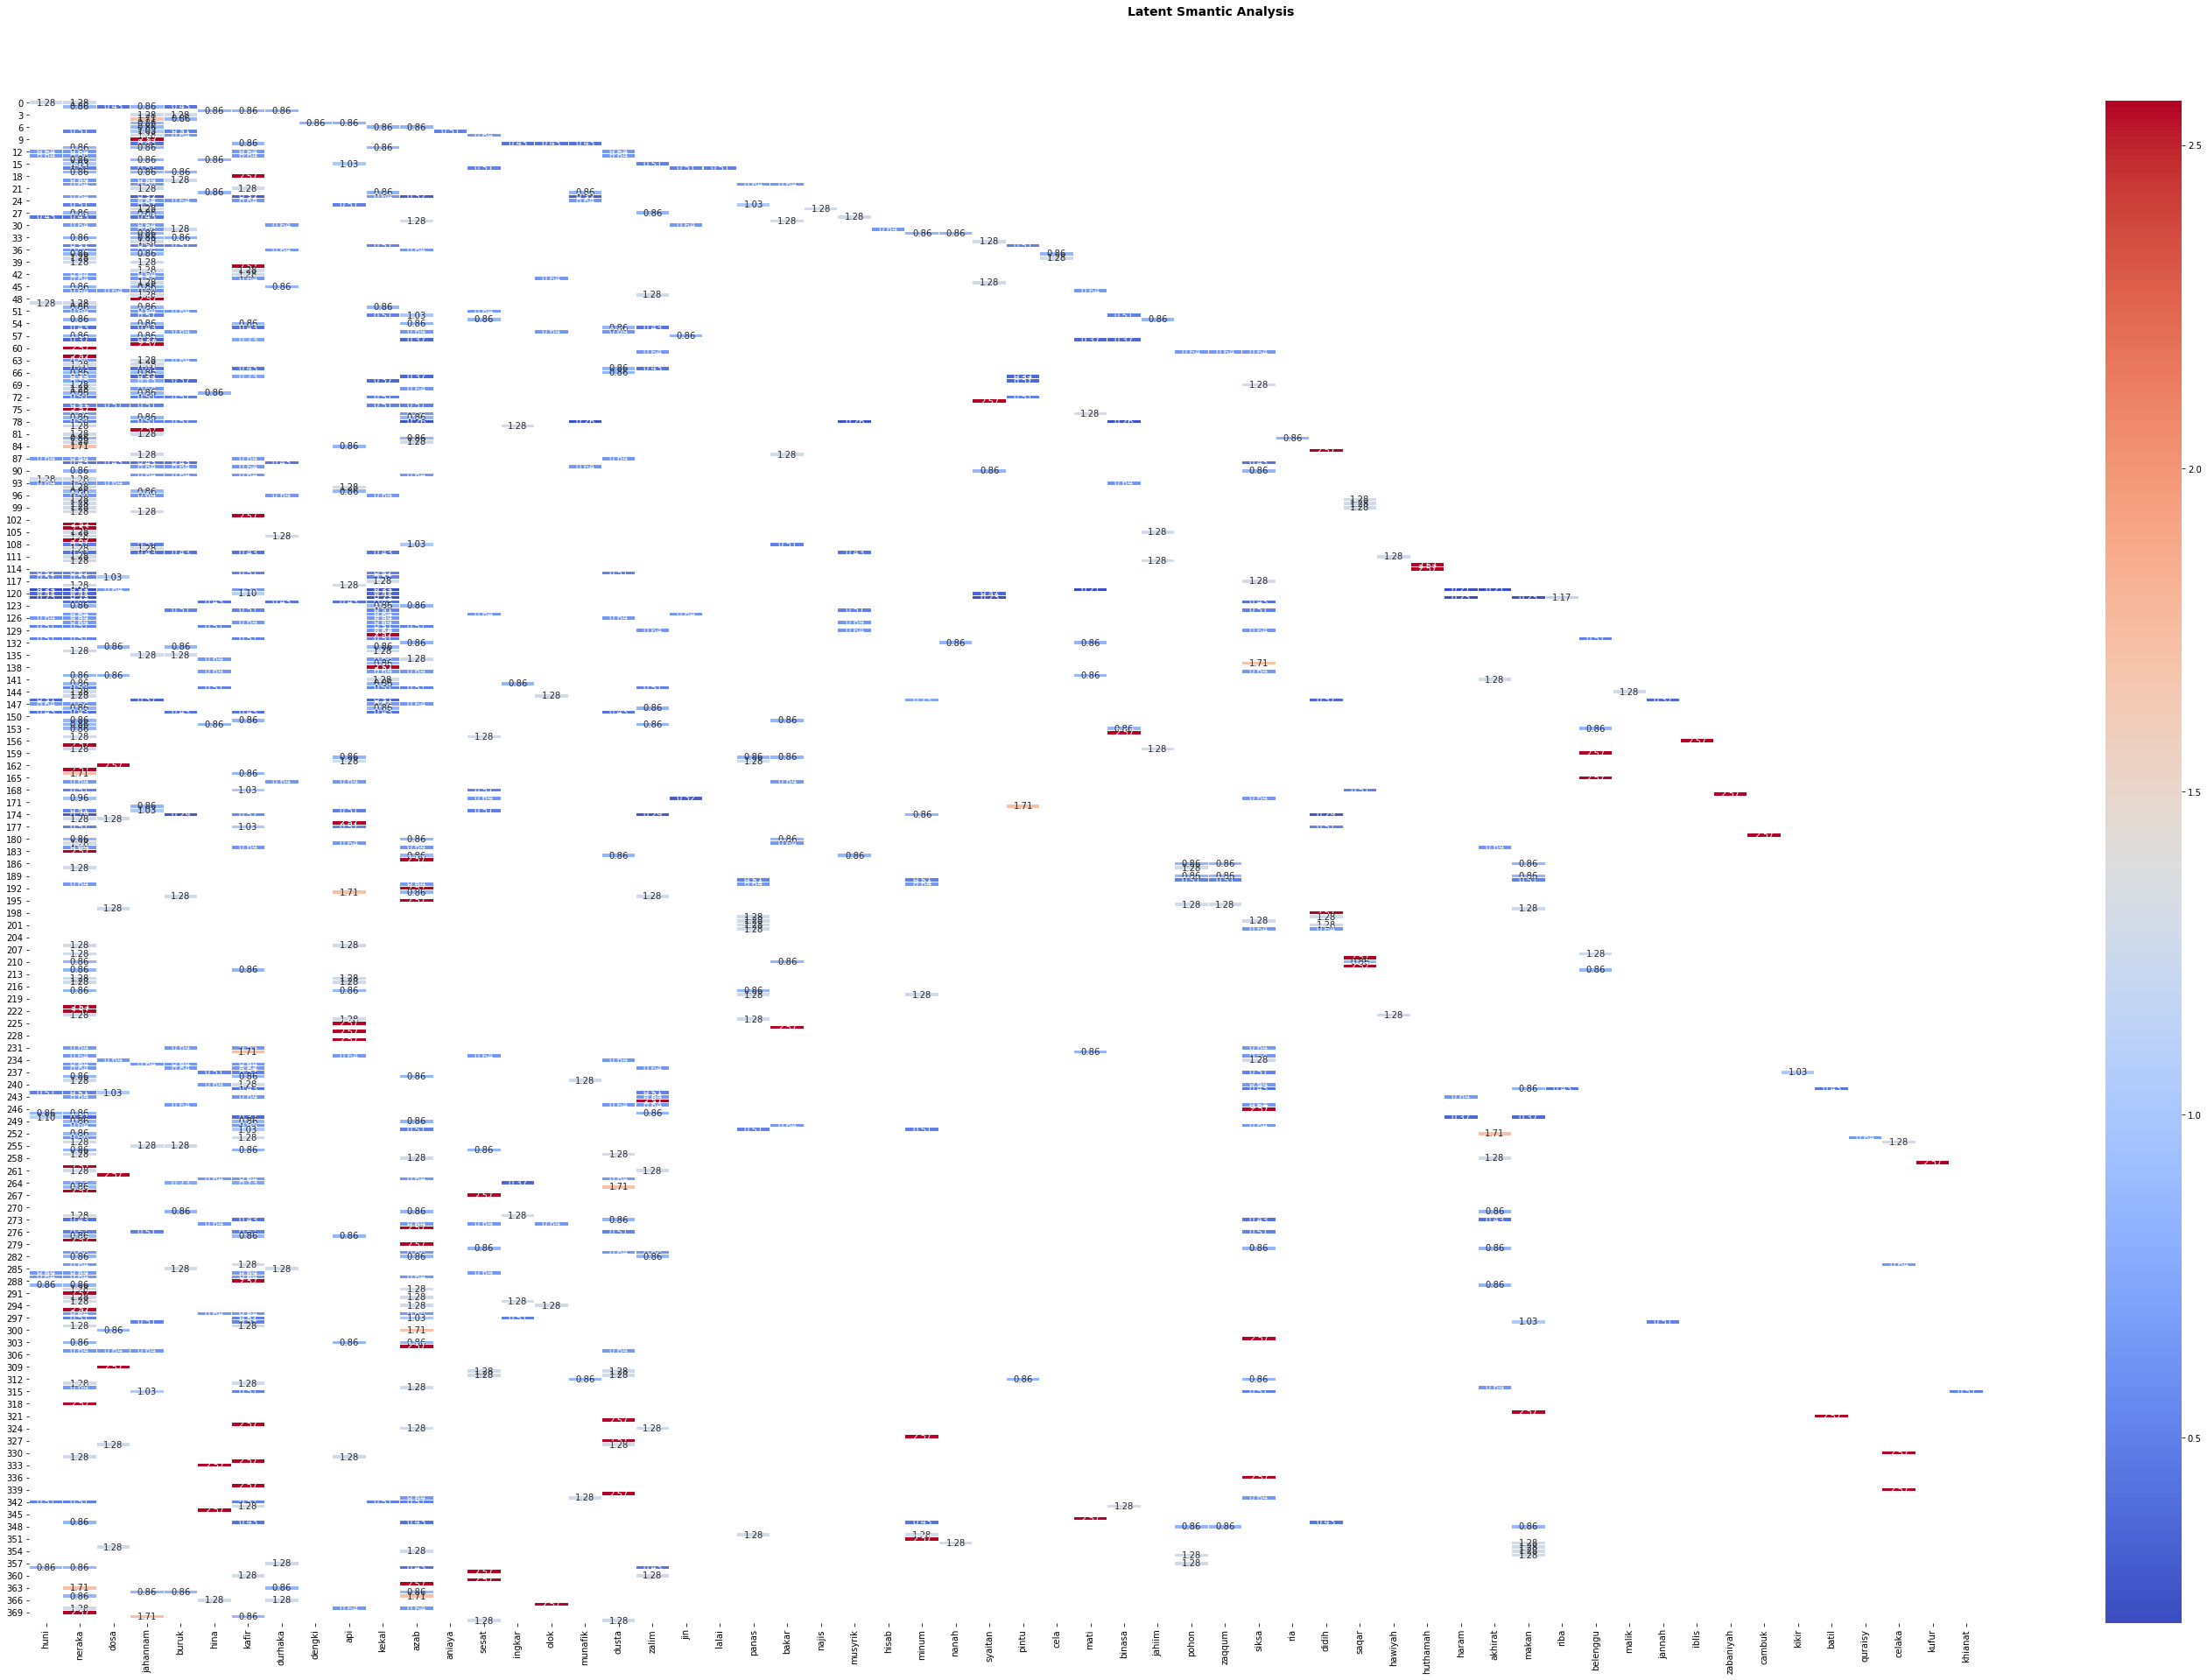

In [26]:
#menampilkan visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(1, 1, figsize=(50,30))

hm = sns.heatmap(tfidf, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Latent Smantic Analysis', 
              fontsize=14, 
              fontweight='bold')

In [27]:
Bow=list(ArrayCount)
Bow.sort()
pd.DataFrame(Bow, columns=['Bow','Jumlah kemunculan'])
#ArrayCount

,Bow,Jumlah kemunculan
0,akhirat,10
1,aniaya,1
2,api,29
3,azab,64
4,bakar,12
5,batil,2
6,belenggu,6
7,binasa,7
8,buruk,36
9,cambuk,1


PROSES MERUBAH KE MATRIKS SVD

In [28]:
#SVD
from scipy import sparse
tfidf.fillna(value=0,inplace=True)
sparse_matrix = sparse.csr_matrix(tfidf.values)
print(sparse_matrix)

  (0, 0)	1.284686954807523
  (0, 1)	1.284686954807523
  (1, 1)	0.856457969871682
  (1, 2)	0.428228984935841
  (1, 3)	0.856457969871682
  (1, 4)	0.428228984935841
  (2, 5)	0.856457969871682
  (2, 6)	0.856457969871682
  (2, 7)	0.856457969871682
  (3, 3)	1.284686954807523
  (3, 4)	1.284686954807523
  (4, 3)	1.712915939743364
  (4, 4)	0.856457969871682
  (5, 3)	0.856457969871682
  (5, 8)	0.856457969871682
  (5, 9)	0.856457969871682
  (6, 3)	0.856457969871682
  (6, 10)	0.856457969871682
  (6, 11)	0.856457969871682
  (7, 1)	0.5138747819230093
  (7, 3)	1.0277495638460186
  (7, 4)	0.5138747819230093
  (7, 12)	0.5138747819230093
  (8, 3)	1.284686954807523
  (8, 4)	0.6423434774037615
  :	:
  (358, 11)	0.428228984935841
  (358, 18)	0.428228984935841
  (359, 13)	2.569373909615046
  (360, 6)	1.284686954807523
  (360, 18)	1.284686954807523
  (361, 13)	2.569373909615046
  (362, 11)	2.569373909615046
  (363, 1)	1.712915939743364
  (363, 7)	0.856457969871682
  (364, 3)	0.856457969871682
  (364, 4)	0.85

In [29]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=11, n_iter=100)
lsa.fit(sparse_matrix)

TruncatedSVD(algorithm='randomized', n_components=11, n_iter=100,
             random_state=None, tol=0.0)

In [30]:
print(lsa.singular_values_)

[16.69550439  9.91389632  9.33861443  9.01530047  7.12362359  6.59876885
  6.23664146  5.83760878  5.47397233  5.43068107  4.88071907]


PROSES LATENT SEMANTIC ANALYSIS (LSA)

In [31]:
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(sparse_matrix, 
                              n_components=11,
                              n_iter=100,
                              random_state=None)

U = pd.DataFrame(U)
print(U)

Sigma = pd.DataFrame(Sigma)
print(Sigma)

VT = pd.DataFrame(VT)
print(VT)

In [32]:
from pandas import DataFrame
u = DataFrame(U)
u .fillna(0)

,0,1,2,3,4,5,6,7,8,9,10
0,0.077401,-0.033757,-0.001265,0.010984,-0.021411,-0.001214,-0.002391,0.011540,0.017221,-0.000749,0.009872
1,0.059553,0.032074,-0.037918,-0.069220,-0.011847,0.003383,-0.002028,0.061069,-0.028079,0.008468,-0.008804
2,0.009348,0.058733,-0.023652,0.066747,0.002852,-0.003372,0.012082,-0.000620,0.023669,0.010499,-0.018939
3,0.016556,0.091040,-0.061326,-0.117961,-0.000611,-0.001793,0.001773,0.000795,-0.002624,-0.004126,-0.016935
4,0.019872,0.108690,-0.074731,-0.143473,0.001522,-0.008115,-0.002330,-0.002077,-0.007475,-0.006844,-0.010971
...,...,...,...,...,...,...,...,...,...,...,...
367,0.001470,0.004305,0.006150,-0.000124,-0.002015,0.001531,-0.005532,-0.005320,-0.004098,0.003101,-0.003154
368,0.081545,-0.008796,0.060650,-0.001452,0.072053,-0.009484,-0.008070,-0.001982,-0.005159,-0.003984,-0.015389
369,0.146865,-0.068746,-0.003627,0.009887,-0.029253,-0.022994,-0.000668,-0.007433,-0.013595,-0.008635,0.001294
370,0.024899,0.150434,-0.092423,-0.062637,0.007302,-0.024254,-0.009214,-0.003191,-0.012823,-0.006556,-0.001681


#SVD-VT
import sys
terms = tfidf.fillna(0)
print(color.BOLD,'\t\t\t\t- Data Hasil Pengelompokan Kata Perkonsep - \n',color.END)
for i, comp in enumerate(lsa.components_): 
    termsInComp = zip (terms,comp)
    sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse=True) [:10]
    print(color.BOLD+color.UNDERLINE+"Concept %d:" % i + color.END)
    for term in sortedTerms:
            print("{}".format(color.BLUE+term[0]+color.END))
    print (" ")

In [33]:
#SVD - U
u = pd.DataFrame(U)
konsep1 = 0
ayat = []
p={}
result = {}
ambangbatas=0.005
print(color.BOLD,'\t\t\t\t- Data Hasil Pengelompokan Surah dan Ayat Perkonsep - \n',color.END)
import collections, functools, operator 
while konsep1 < len(lsa.components_):
    for i, comp in enumerate(lsa.components_):
        ayat_c0 = u.sort_values(by = konsep1, ascending=False)[konsep1]
        ayat_c0_index = u.sort_values(by = konsep1, ascending=False).index.tolist()
        c0 = list(zip(ayat_c0_index, ayat_c0))
        print("Concept %d:" % i )
        counter = collections.Counter()
        for i in c0:
            if i[1] > ambangbatas:
                #p=(i[0], posts['Surah'][i[0]],posts['Ayat'][i[0]])
                p=[{(posts['Surah'][i[0]],posts['Ayat'][i[0]])}]
#                 print(p)
            for s in p: 
#                 print(s)
                counter.update(s)
            result = dict(counter)
#             print(result)
#                 result = dict(counter)
        print(color.BLUE+"Surah & Ayat"+color.END)
        print (result.keys(),color.BOLD,'Jumlah :',color.END,color.RED,len(result.keys()),'Surah & Ayat',color.END)
        print(" ")
        konsep1+=1

 				- Data Hasil Pengelompokan Surah dan Ayat Perkonsep - 
 
Concept 0:
Surah & Ayat
dict_keys([(71, 25), (90, 20), (37, 163), (40, 48), (37, 23), (79, 36), (79, 39), (83, 16), (19, 70), (27, 90), (26, 96), (41, 19), (92, 14), (67, 7), (44, 47), (25, 12), (45, 34), (33, 66), (67, 8), (54, 48), (38, 59), (52, 13), (78, 21), (17, 63), (38, 85), (89, 23), (40, 49), (48, 13), (57, 15), (41, 24), (40, 46), (52, 27), (40, 47), (70, 15), (77, 31), (2, 167), (77, 32), (84, 12), (69, 31), (21, 99), (23, 104), (22, 51), (67, 10), (2, 119), (16, 62), (19, 72), (26, 94), (18, 53), (40, 7), (82, 14), (29, 25), (50, 24), (41, 40), (74, 26), (74, 42), (74, 27), (102, 6), (81, 12), (37, 68), (73, 12), (101, 9), (101, 10), (45, 35), (4, 145), (17, 39), (11, 106), (37, 64), (43, 77), (7, 41), (45, 10), (8, 14), (4, 56), (72, 15), (38, 61), (4, 169), (23, 103), (33, 64), (8, 16), (14, 29), (39, 60), (51, 13), (9, 109), (2, 206), (19, 86), (40, 60), (7, 18), (17, 18), (32, 13), (5, 37), (14, 30), (35, 37

In [34]:
#PROSES DICT SURAT DAN AYAT
surahayatDict = {}
count = 0;
for row in zip(posts['Surah'], posts['Ayat']):
    surahayatDict[count] = row
    count+=1
#print(surahayatDict)

In [35]:
tfidfDict = {}
gabunganArray=[]
for ind, row in tfidf.iterrows():
    for k, n in row.items():
        #print("index: {}, bow: {}, bobot: {}".format(surahayatDict[index], b, j))
        tfidfDict=surahayatDict[ind], k,n
        if tfidfDict[2] != 0.0:
            gabunganArray.append(tfidfDict)
            print(tfidfDict)

((2, 119), 'huni', 1.284686954807523)
((2, 119), 'neraka', 1.284686954807523)
((2, 206), 'neraka', 0.856457969871682)
((2, 206), 'dosa', 0.428228984935841)
((2, 206), 'jahannam', 0.856457969871682)
((2, 206), 'buruk', 0.428228984935841)
((3, 112), 'hina', 0.856457969871682)
((3, 112), 'kafir', 0.856457969871682)
((3, 112), 'durhaka', 0.856457969871682)
((3, 162), 'jahannam', 1.284686954807523)
((3, 162), 'buruk', 1.284686954807523)
((3, 197), 'jahannam', 1.712915939743364)
((3, 197), 'buruk', 0.856457969871682)
((4, 55), 'jahannam', 0.856457969871682)
((4, 55), 'dengki', 0.856457969871682)
((4, 55), 'api', 0.856457969871682)
((4, 93), 'jahannam', 0.856457969871682)
((4, 93), 'kekal', 0.856457969871682)
((4, 93), 'azab', 0.856457969871682)
((4, 97), 'neraka', 0.5138747819230093)
((4, 97), 'jahannam', 1.0277495638460186)
((4, 97), 'buruk', 0.5138747819230093)
((4, 97), 'aniaya', 0.5138747819230093)
((4, 115), 'jahannam', 1.284686954807523)
((4, 115), 'buruk', 0.6423434774037615)
((4, 115

In [36]:
data = pd.DataFrame(gabunganArray,columns=['SURAH & AYAT','BAGOFWORDS','TF-IDF'])
data.head(1000)

,SURAH & AYAT,BAGOFWORDS,TF-IDF
0,"(2, 119)",huni,1.284687
1,"(2, 119)",neraka,1.284687
2,"(2, 206)",neraka,0.856458
3,"(2, 206)",dosa,0.428229
4,"(2, 206)",jahannam,0.856458
...,...,...,...
889,"(40, 48)",neraka,2.569374
890,"(40, 50)",jahannam,1.712916
891,"(40, 50)",kafir,0.856458
892,"(67, 9)",sesat,1.284687


#menampilkan Bag Of Words Dengan Surah dan Ayat LSA
terms = tfidf
d={}
arayData={}
for i, comp in enumerate(lsa.components_): 
    termsInComp = zip (terms,comp)
    sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse= True)[:10]
    print("Concept %d:" % i )
    jumlah=0
    for  term in sortedTerms:
        a=term[0]
        d[a] = [data['SURAH & AYAT'][j] for j in data[data['BAGOFWORDS']==a].index]
        print("{}: {}:{}".format(a,d[a],len(d[a])))
    print(" ")

#menampilkan Jumlah TF-IDF yang sesuai terjemahanya LSA
terms = tfidf
d={}
result = {}
jumlahArray=[]
import collections, functools, operator 
for i, comp in enumerate(lsa.components_): 
    termsInComp = zip (terms,comp)
    sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse=True) [:10]
    print("Concept %d:" % i )
    counter = collections.Counter()
    for  term in sortedTerms:
        a=term[0]
        d = [{data['SURAH & AYAT'][j]:data['TF-IDF'][j]} for j in data[data['BAGOFWORDS']==a].index] 
        print("{} {} {}".format(a,d,len(d)))
        for s in d: 
            counter.update(s)
        result = dict(counter) 
    print("\n")
    #print("Menjumlahkan Nilai TF-IDF Dari Surat & Ayat Yang Muncul Lebih Dari Satu \n")
    #print(str(result))
    #print(" ")

#membuat key dict sesuai consept LSA
terms = tfidf
d={}
result = {}
#DataArrayTematik=[]
import collections, functools, operator 
for i, comp in enumerate(lsa.components_): 
    termsInComp = zip (terms,comp)
    sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse=True) [:10]
    print("Concept %d:" % i )
    counter = collections.Counter()
    for  term in sortedTerms:
        a=term[0]
        d = [{data['SURAH & AYAT'][j]} for j in data[data['BAGOFWORDS']==a].index] 
        #print("{} {} {}".format(a,d,len(d)))
        for s in d: 
            counter.update(s)
        result = dict(counter)
    #DataArrayTematik.append(sorted(result.keys()))
    print("\n")
    print("Menjumlahkan Surat & Ayat Yang Muncul Lebih Dari Satu \n")
    print(sorted(result.keys()), len(result))
    print(" ")

EVALUASI

In [37]:
#proses memebaca file csv cordoba
dataTema = pd.read_csv(open('subtema_neraka.csv', newline='', encoding='utf-8'), delimiter=';')

In [38]:
#menampilkan data csv
print (dataTema.shape)
dataTema.head(590)

(590, 4)


,Subtema,Surah,Ayat,Terjemahan
0,Nama-Nama Neraka,2,119,Sesungguhnya Kami telah mengutusmu (Muhammad) ...
1,Nama-Nama Neraka,2,206,"Dan apabila dikatakan kepadanya ""Bertakwalah k..."
2,Nama-Nama Neraka,3,112,Mereka diliputi kehinaan di mana saja mereka b...
3,Nama-Nama Neraka,3,162,Apakah orang yang mengikuti keridhaan Allah sa...
4,Nama-Nama Neraka,3,197,"Itu hanyalah kesenangan sementara, kemudian te..."
...,...,...,...,...
585,Percakapan Ahli Neraka,40,49,Dan orang-orang yang berada dalam neraka berka...
586,Percakapan Ahli Neraka,40,50,"Penjaga Jahannam berkata ""Dan apakah belum dat..."
587,Percakapan Ahli Neraka,43,77,"Mereka berseru ""Hai Malik biarlah Tuhanmu memb..."
588,Percakapan Ahli Neraka,67,9,"Mereka menjawab ""Benar ada"", sesungguhnya tela..."


In [39]:
dictSurahAyat={}
count=0
for row in zip(dataTema['Surah'],dataTema['Ayat']):
    dictSurahAyat[count]=row
    count+=1

In [40]:
dictJoin={}
arrayJoin=[]
for isi,surahayat in dictSurahAyat.items():
    dictJoin = dataTema['Subtema'][isi], surahayat, dataTema['Terjemahan'][isi]
    arrayJoin.append(dictJoin)

In [41]:
dataTema1 = pd.DataFrame(arrayJoin, columns=['Subtema','Surah & Ayat', 'Terjemahan'])
dataTema1.head(590)

,Subtema,Surah & Ayat,Terjemahan
0,Nama-Nama Neraka,"(2, 119)",Sesungguhnya Kami telah mengutusmu (Muhammad) ...
1,Nama-Nama Neraka,"(2, 206)","Dan apabila dikatakan kepadanya ""Bertakwalah k..."
2,Nama-Nama Neraka,"(3, 112)",Mereka diliputi kehinaan di mana saja mereka b...
3,Nama-Nama Neraka,"(3, 162)",Apakah orang yang mengikuti keridhaan Allah sa...
4,Nama-Nama Neraka,"(3, 197)","Itu hanyalah kesenangan sementara, kemudian te..."
...,...,...,...
585,Percakapan Ahli Neraka,"(40, 49)",Dan orang-orang yang berada dalam neraka berka...
586,Percakapan Ahli Neraka,"(40, 50)","Penjaga Jahannam berkata ""Dan apakah belum dat..."
587,Percakapan Ahli Neraka,"(43, 77)","Mereka berseru ""Hai Malik biarlah Tuhanmu memb..."
588,Percakapan Ahli Neraka,"(67, 9)","Mereka menjawab ""Benar ada"", sesungguhnya tela..."


In [42]:
dictSubTema={}
for s in dataTema1['Subtema']:
    dictSubTema[s]=[dataTema1['Surah & Ayat'][x] for x in dataTema1[dataTema1['Subtema']==s].index]

In [43]:
print(color.BOLD,'\t\t\t\t\t- Data Gold Standard - \n',color.END)
for subTema,surahAyat in dictSubTema.items():
    print("#",color.BLUE+subTema+color.END,surahAyat,color.BOLD,'Jumlah :',color.END,color.RED,len(surahAyat),'Surah & Ayat',color.END)

 					- Data Gold Standard - 
 
# Nama-Nama Neraka [(2, 119), (2, 206), (3, 112), (3, 162), (3, 197), (4, 55), (4, 93), (4, 97), (4, 115), (4, 121), (4, 140), (4, 169), (5, 10), (5, 86), (7, 18), (7, 41), (7, 179), (8, 16), (8, 36), (8, 37), (9, 35), (9, 49), (9, 63), (9, 68), (9, 73), (9, 81), (9, 95), (9, 109), (9, 113), (11, 82), (11, 119), (13, 18), (14, 16), (14, 29), (15, 43), (16, 29), (17, 8), (17, 18), (17, 39), (17, 63), (17, 98), (18, 100), (18, 102), (18, 106), (19, 68), (19, 86), (20, 74), (21, 29), (21, 98), (22, 51), (23, 103), (25, 34), (25, 65), (26, 91), (29, 54), (29, 68), (30, 10), (32, 13), (35, 36), (36, 63), (37, 23), (37, 63), (37, 163), (38, 56), (38, 85), (39, 32), (39, 60), (39, 71), (39, 72), (40, 7), (40, 49), (40, 60), (40, 76), (43, 62), (43, 74), (44, 47), (44, 56), (45, 10), (48, 6), (50, 24), (50, 30), (52, 13), (52, 18), (52, 27), (54, 48), (56, 93), (56, 94), (57, 19), (58, 8), (66, 9), (67, 5), (67, 6), (67, 10), (67, 11), (69, 31), (72, 15), (72, 2

In [44]:
a=dataTema1.to_dict('index')
print(a[0])

{'Subtema': 'Nama-Nama Neraka', 'Surah & Ayat': (2, 119), 'Terjemahan': 'Sesungguhnya Kami telah mengutusmu (Muhammad) dengan kebenaran sebagai pembawa berita gembira dan pemberi peringatan, dan kamu tidak akan diminta (pertanggungan jawab) tentang penghuni-penghuni neraka.'}


EVALUASI PRECISION


tfidfDict = {}
gabunganArray=[]
for index, row in tfidf.iterrows():
    for b, s in row.items():
        print("index: {}, bow: {}, bobot: {}".format(surahayatDict[index], b, s))
        tfidfDict=b,surahayatDict[index],s
        if tfidfDict[2] > 0:
            gabunganArray.append(tfidfDict)
data = pd.DataFrame(gabunganArray,columns=['Bagofwords','Surat & Ayat','TF-IDF'])

In [45]:
U = pd.DataFrame(U)
gabungan=[]
konsep1 = 0
p={}
result = {}
threshold = 70
mirip = []
print(color.BOLD,'\t\t\t\t- Data Hasil Pengelompokan Tematik Al-Qur`an LSA - \n',color.END)
import collections, functools, operator 
while konsep1 < len(lsa.components_):
    for i, comp in enumerate(lsa.components_):
        ayat_c0 = u.sort_values(by = konsep1, ascending=False)[konsep1]
        ayat_c0_index = u.sort_values(by = konsep1, ascending=False).index.tolist()
        c0 = list(zip(ayat_c0_index, ayat_c0))
        konsep="Konsep %d"% i
        print(color.BOLD+color.UNDERLINE+konsep+color.END)
        counter = collections.Counter()
        for i in c0:
            if i[1] > ambangbatas:
                p=[{(posts['Surah'][i[0]],posts['Ayat'][i[0]])}]
            for s in p: 
                counter.update(s)
            result = dict(counter)
        konsep1+=1
#-------------------------------------------------------------------------------------------------------------------------
    #k = list(result.keys()) ######################
    #print(result.keys(), len(result.keys())) 
    #ArrayTematik.append(k)##########
        for subTema,surahAyat in dictSubTema.items():
            #print(key,k)
            count=0
            jumlah=0
            jumlah1=0
            precision=0
            recall=0
            f1score=0
            l =0
            arrayn=[]
            for s in surahAyat:
                #print(d)
                #arrayx=[]###########
                for d in result.keys():

                    #arrayx.append(d)########
                    #print(d)
                    if s == d:
                        arrayn.append(s)
                        count+=1
                        jumlah1=(len(surahAyat)-count)
                        jumlah=len(result.keys())-count                       
                        precision= count/(count+jumlah)*100
                        recall= count/(count+jumlah1)*100
                        f1score=2*(precision*recall)/(precision+recall)
                    else:
                        jumlah1=(len(surahAyat)-count)
                        jumlah=len(result.keys())-count
                        precision= count/(count+jumlah)*100
                        recall= count/(count+jumlah1)*100
#                       f1score=2*(precision*recall)/(precision+recall)
            #print(jumlah1,jumlah)
            #print(jumlah1, recall, count)
            print(color.BLUE+subTema+color.END,"\nSurat & Ayat Tepat (TP) ",count,"\nSurah & Ayat Tidak Tepat (FP)",jumlah,"\nSurah & Ayat Tidak Tepat (FN)",jumlah1,"\nPrecision",(int(precision)),'%',
                  "\nRecall",(int(recall)),'%',"\nF1-Score",(int(f1score)),'%',"\n")

            #########
            #liskunci=list(kunci for kunci in arrayx)
            #liscek = list(cek for cek in arrayn)
            gabungan.append((konsep,subTema,count,jumlah,jumlah1,precision,recall,f1score))
            #print(gabungan)
            #for setcek in liscek:
            #    liskunci.remove(setcek)
            ########

            if int(f1score) >= threshold:
                #DataArrayTidakSama.append(liskunci)##########
                mirip.append((konsep,subTema,count,jumlah,jumlah1,precision,recall,f1score))
                #print(mirip)
            #jumlahArray.append(mirip)
        #print("====================== NILAI KEMIRIPAN TERTINGGI =================================")
        #for value in mirip:
        #    print(color.BOLD+color.UNDERLINE+value[0]+color.END,color.BLUE+value[1]+color.END,"\nSurat & Ayat Tepat ",value[2],"\nSurah & Ayat Tidak Tepat",value[3],"\nPrecision",value[4],'%',"\n")

 				- Data Hasil Pengelompokan Tematik Al-Qur`an LSA - 
 
[-1mKonsep 0
Nama-Nama Neraka 
Surat & Ayat Tepat (TP)  108 
Surah & Ayat Tidak Tepat (FP) 171 
Surah & Ayat Tidak Tepat (FN) 7 
Precision 38 % 
Recall 93 % 
F1-Score 54 % 

Keabadian Neraka 
Surat & Ayat Tepat (TP)  43 
Surah & Ayat Tidak Tepat (FP) 236 
Surah & Ayat Tidak Tepat (FN) 3 
Precision 15 % 
Recall 93 % 
F1-Score 26 % 

Memasuki Neraka 
Surat & Ayat Tepat (TP)  19 
Surah & Ayat Tidak Tepat (FP) 260 
Surah & Ayat Tidak Tepat (FN) 5 
Precision 6 % 
Recall 79 % 
F1-Score 12 % 

Penjaga Neraka 
Surat & Ayat Tepat (TP)  6 
Surah & Ayat Tidak Tepat (FP) 273 
Surah & Ayat Tidak Tepat (FN) 2 
Precision 2 % 
Recall 75 % 
F1-Score 4 % 

Sifat Neraka 
Surat & Ayat Tepat (TP)  57 
Surah & Ayat Tidak Tepat (FP) 222 
Surah & Ayat Tidak Tepat (FN) 32 
Precision 20 % 
Recall 64 % 
F1-Score 30 % 

Sifat Ahli Neraka dan Kejahatan Mereka 
Surat & Ayat Tepat (TP)  180 
Surah & Ayat Tidak Tepat (FP) 99 
Surah & Ayat Tidak Tepat (FN) 42

Sifat Ahli Neraka dan Kejahatan Mereka 
Surat & Ayat Tepat (TP)  29 
Surah & Ayat Tidak Tepat (FP) 33 
Surah & Ayat Tidak Tepat (FN) 193 
Precision 46 % 
Recall 13 % 
F1-Score 20 % 

Siksaan Ahli Neraka Dilipatgandakan 
Surat & Ayat Tepat (TP)  0 
Surah & Ayat Tidak Tepat (FP) 62 
Surah & Ayat Tidak Tepat (FN) 2 
Precision 0 % 
Recall 0 % 
F1-Score 0 % 

Mereka yang Kekal Dalam Neraka 
Surat & Ayat Tepat (TP)  0 
Surah & Ayat Tidak Tepat (FP) 62 
Surah & Ayat Tidak Tepat (FN) 25 
Precision 0 % 
Recall 0 % 
F1-Score 0 % 

Makanan dan Minuman Ahli Neraka 
Surat & Ayat Tepat (TP)  6 
Surah & Ayat Tidak Tepat (FP) 56 
Surah & Ayat Tidak Tepat (FN) 18 
Precision 9 % 
Recall 25 % 
F1-Score 13 % 

Pohon Zaquum 
Surat & Ayat Tepat (TP)  1 
Surah & Ayat Tidak Tepat (FP) 61 
Surah & Ayat Tidak Tepat (FN) 7 
Precision 1 % 
Recall 12 % 
F1-Score 2 % 

Percakapan Ahli Neraka 
Surat & Ayat Tepat (TP)  2 
Surah & Ayat Tidak Tepat (FP) 60 
Surah & Ayat Tidak Tepat (FN) 25 
Precision 3 % 
Recall 7 % 
F

Sifat Ahli Neraka dan Kejahatan Mereka 
Surat & Ayat Tepat (TP)  59 
Surah & Ayat Tidak Tepat (FP) 31 
Surah & Ayat Tidak Tepat (FN) 163 
Precision 65 % 
Recall 26 % 
F1-Score 37 % 

Siksaan Ahli Neraka Dilipatgandakan 
Surat & Ayat Tepat (TP)  1 
Surah & Ayat Tidak Tepat (FP) 89 
Surah & Ayat Tidak Tepat (FN) 1 
Precision 1 % 
Recall 50 % 
F1-Score 2 % 

Mereka yang Kekal Dalam Neraka 
Surat & Ayat Tepat (TP)  15 
Surah & Ayat Tidak Tepat (FP) 75 
Surah & Ayat Tidak Tepat (FN) 10 
Precision 16 % 
Recall 60 % 
F1-Score 26 % 

Makanan dan Minuman Ahli Neraka 
Surat & Ayat Tepat (TP)  8 
Surah & Ayat Tidak Tepat (FP) 82 
Surah & Ayat Tidak Tepat (FN) 16 
Precision 8 % 
Recall 33 % 
F1-Score 14 % 

Pohon Zaquum 
Surat & Ayat Tepat (TP)  2 
Surah & Ayat Tidak Tepat (FP) 88 
Surah & Ayat Tidak Tepat (FN) 6 
Precision 2 % 
Recall 25 % 
F1-Score 4 % 

Percakapan Ahli Neraka 
Surat & Ayat Tepat (TP)  7 
Surah & Ayat Tidak Tepat (FP) 83 
Surah & Ayat Tidak Tepat (FN) 20 
Precision 7 % 
Recall 2

In [46]:
# simpan ke csv
Data_Evaluasi=pd.DataFrame(gabungan)
with open('Data_Evaluasi_Konsep.csv', 'w',encoding='utf-8',newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(gabungan)
    print ("proses selesai")
csvFile.close()

proses selesai


In [47]:
print(color.BOLD,'\t\t\t- Data Hasil Perhitungan Evaluasi Tematik Al-Qur`an Cordoba Terbaik - \n',color.END)
for value in mirip:
    print(color.BOLD+color.UNDERLINE+value[0]+color.END,color.BLUE+value[1]+color.END,"\nSurat & Ayat Tepat (TP)",value[2],"\nSurah & Ayat Tidak Tepat (FP)",value[3],"\nSurah & Ayat Tidak Tepat (FN)",value[4],"\nPrecision",value[5],'%',"\nRacall",value[6],'%',"\nF1-Score",value[7],'%',"\n")

 			- Data Hasil Perhitungan Evaluasi Tematik Al-Qur`an Cordoba Terbaik - 
 
[-1mKonsep 0 Sifat Ahli Neraka dan Kejahatan Mereka 
Surat & Ayat Tepat (TP) 180 
Surah & Ayat Tidak Tepat (FP) 99 
Surah & Ayat Tidak Tepat (FN) 42 
Precision 64.51612903225806 % 
Racall 81.08108108108108 % 
F1-Score 71.8562874251497 % 



In [48]:
u = pd.DataFrame(U)
konsep1 = 0
p={}
result = {}
ArrayTematik=[]
DataArrayTidakSama=[]
print(color.BOLD,'\t\t\t\t- Data Hasil Pengelompokan Tematik Al-Qur`an LSA - \n',color.END)
import collections, functools, operator 
while konsep1 < len(lsa.components_):
    for i, comp in enumerate(lsa.components_):
        ayat_c0 = u.sort_values(by = konsep1, ascending=False)[konsep1]
        ayat_c0_index = u.sort_values(by = konsep1, ascending=False).index.tolist()
        c0 = list(zip(ayat_c0_index, ayat_c0))
        konsep="Konsep %d"% i
        #print(color.BOLD+color.UNDERLINE+konsep+color.END)
        counter = collections.Counter()
        for i in c0:
            if i[1] > ambangbatas:
                p=[{(posts['Surah'][i[0]],posts['Ayat'][i[0]])}]
            for s in p: 
                counter.update(s)
            result = dict(counter)
            k = list(result.keys())
        ArrayTematik.append(k)
        konsep1+=1
#-------------------------------------------------------------------------------------------------------------------------
        for subTema,surahAyat in dictSubTema.items():
            count=0
            jumlah=0
            jumlah1=0
            precision=0
            racall=0
            f1score=0
            l =0
            arrayn=[]
            for s in surahAyat:
                arrayx=[]
                for d in result.keys():
                    arrayx.append(d)
                    if s==d:
                        #print(d)
                        arrayn.append(s)
                        count+=1
                        jumlah=len(result.keys())-count
                        jumlah1=(len(surahAyat)-count)
                        precision= count/(count+jumlah)*100
                        recall= count/(count+jumlah1)*100
                        f1score=2*(precision*recall)/(precision+recall)
                    else:
                        jumlah1=(len(surahAyat)-count)
                        jumlah=len(result.keys())-count
                        precision= count/(count+jumlah)*100
                        recall= count/(count+jumlah1)*100

            #merubah ke list data  
            liskunci=list(kunci for kunci in arrayx)
            liscek = list(cek for cek in arrayn)

            #print(sorted(liskunci), len(liskunci))
            #print(sorted(liscek), len(liscek))

            #remove data yang sama
            for setcek in liscek:
                liskunci.remove(setcek)

            if float(f1score) >= threshold:
                print(color.BOLD+color.UNDERLINE+konsep+color.END)
                DataArrayTidakSama.append(liskunci)
                print(color.BLUE+color.BOLD+"Tematik Pengelompokan Latent Semantic Analysis"+color.END)
                print(sorted(result.keys()),color.BOLD,'Jumlah :',color.END,color.RED,len(result.keys()),'Surah & Ayat\n',color.END)
                #print("DATA TP ")
                print(color.BLUE+"Surat & Ayat Tepat"+color.END,sorted(arrayn),color.BOLD,'Jumlah :',color.END,color.RED,len(arrayn),'Surah & Ayat\n',color.END)
                #print("DATA TF ")
                print(color.BLUE+"Surah & Ayat Tidak Tepat"+color.END,liskunci,color.BOLD,'Jumlah :',color.END,color.RED,len(liskunci),'Surah & Ayat\n',color.END)
                #print("PRECISION ")
                #print(subTema,"\nSurat & Ayat Tepat :",count,"\nSurah & Ayat Tidak Tepat :",jumlah,"\nPrecision :",total,"\n")

 				- Data Hasil Pengelompokan Tematik Al-Qur`an LSA - 
 
[-1mKonsep 0
Tematik Pengelompokan Latent Semantic Analysis
[(2, 24), (2, 39), (2, 81), (2, 119), (2, 126), (2, 161), (2, 162), (2, 167), (2, 175), (2, 206), (2, 217), (2, 257), (2, 275), (3, 12), (3, 112), (3, 116), (3, 151), (3, 162), (3, 192), (3, 197), (4, 14), (4, 37), (4, 55), (4, 56), (4, 93), (4, 97), (4, 115), (4, 121), (4, 140), (4, 145), (4, 151), (4, 169), (5, 10), (5, 29), (5, 37), (5, 72), (5, 80), (5, 86), (6, 70), (6, 128), (6, 129), (6, 157), (7, 18), (7, 36), (7, 38), (7, 41), (7, 44), (7, 47), (7, 50), (7, 179), (8, 14), (8, 16), (8, 36), (8, 37), (8, 50), (9, 17), (9, 35), (9, 49), (9, 68), (9, 73), (9, 81), (9, 95), (9, 101), (9, 109), (9, 113), (10, 4), (10, 27), (11, 16), (11, 17), (11, 82), (11, 106), (11, 107), (11, 119), (13, 5), (13, 18), (13, 25), (14, 16), (14, 17), (14, 28), (14, 29), (14, 30), (15, 43), (15, 44), (16, 29), (16, 62), (17, 8), (17, 10), (17, 18), (17, 39), (17, 63), (17, 97), (17, 

In [49]:
#membuat array data precision
Array_Data_TF=[]
Array_data_akhir=[]
Array_data=[]
Array_Data_Komplek=[]
for data_tidak_sama in DataArrayTidakSama:
    for set_data in data_tidak_sama:
        Array_Data_TF.append(set_data)

set_data_akhir=list(dict.fromkeys(Array_Data_TF))
Array_data_akhir.append(set_data_akhir)
for baris in Array_data_akhir:
    for kolom in baris:
        Array_data.append(kolom)
        
#panggil data
DataTerjemahan={}
for a in dataTema1['Surah & Ayat']:
    for x in dataTema1[dataTema1['Surah & Ayat']==a].index:
        DataTerjemahan[a] = dataTema1['Terjemahan'][x] 
    
for baris in Array_data:
    for subTema,surahAyat in DataTerjemahan.items():
        if baris == subTema:
            Array_Data_Komplek.append((baris,surahAyat))

In [50]:
#Menampilkan data csv hasil akhir
pd.DataFrame(Array_Data_Komplek, columns=['Surah & Ayat', 'Terjemahan'])

,Surah & Ayat,Terjemahan
0,"(90, 20)",Mereka berada dalam neraka yang ditutup rapat.
1,"(37, 163)",kecuali orang-orang yang akan masuk neraka yan...
2,"(40, 48)","Orang-orang yang menyombongkan diri menjawab ""..."
3,"(37, 23)",selain Allah maka tunjukkanlah kepada mereka j...
4,"(79, 36)",dan diperlihatkan neraka dengan jelas kepada s...
...,...,...
94,"(9, 101)",Di antara orang-orang Arab Badwi yang di sekel...
95,"(47, 15)",(Apakah) perumpamaan (penghuni) jannah yang di...
96,"(20, 101)",mereka kekal di dalam keadaan itu. Dan amat bu...
97,"(40, 39)","Hai kaumku, sesungguhnya kehidupan dunia ini h..."


In [51]:
#menyimpan file ke csv
with open('Data_Evaluasi_Pakar.csv', 'w',encoding='utf-8',newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(Array_Data_Komplek)
    print ("proses selesai")
csvFile.close()

proses selesai


In [52]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>